In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class Bandit:
    def __init__(self, m):
        self.m = m
        self.m_estimate = 0.
        self.k = 0. # num samples collected so far for the bandit
    def pull(self):
    # Generates a random normally distributed reward with mean m and standard deviation 1
        return np.random.randn()+self.m
    def update(self, R):
        self.k += 1.
        self.m_estimate = self.m_estimate + (1/self.k)*(R-self.m_estimate)

In [ ]:
def run_experiment(m1, m2, m3, eps, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    data = np.empty(N)
    for i in range(N):
    # epsilon greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.m_estimate for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.m_estimate)
    return cumulative_average

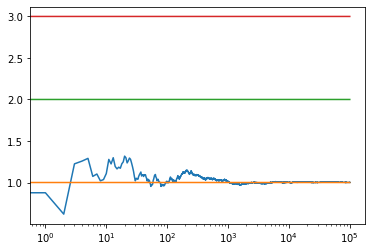

1.0014348084639986
0.0
0.0


array([1.35164509, 0.87641393, 0.61928344, ..., 1.00143098, 1.00143813,
       1.00143481])

In [ ]:
run_experiment(1, 2, 3, 0, 100000)